# SI 670: Applied Machine Learning Final Project
## Music Genre Classification
Matt Whitehead (mwwhite)

## Neural Modeling

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import Model
from keras.layers import Dense, Flatten, Input, Dropout
from keras.applications.vgg16 import VGG16
from keras import regularizers

In [8]:
X = np.load('X.npy')
y = np.load('y.npy')

In [9]:
X = np.stack((X,) * 3, -1)
y = pd.factorize(y)[0]

In [10]:
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1026, test_size=0.3)

In [30]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=X_train[0].shape)
flatten = Flatten()(base_model.output)
dense = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(flatten)
drop = Dropout(0.3)(dense)
out = Dense(10, activation='softmax')(drop)
model = Model(inputs=base_model.input, outputs=out)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 128, 129, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 129, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 129, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [31]:
hist = model.fit(X_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 13300 samples, validate on 5700 samples
Epoch 1/30
13300/13300 [==============================] - 143s 11ms/step - loss: 3.3930 - acc: 0.2662 - val_loss: 2.1087 - val_acc: 0.3161
Epoch 2/30
13300/13300 [==============================] - 138s 10ms/step - loss: 1.9826 - acc: 0.3835 - val_loss: 1.7768 - val_acc: 0.4474
Epoch 3/30
13300/13300 [==============================] - 138s 10ms/step - loss: 1.6742 - acc: 0.4795 - val_loss: 1.5210 - val_acc: 0.5400
Epoch 4/30
13300/13300 [==============================] - 138s 10ms/step - loss: 1.4214 - acc: 0.5686 - val_loss: 1.3364 - val_acc: 0.5853
Epoch 5/30
13300/13300 [==============================] - 139s 10ms/step - loss: 1.2355 - acc: 0.6270 - val_loss: 1.1452 - val_acc: 0.6553
Epoch 6/30
13300/13300 [==============================] - 139s 10ms/step - loss: 1.0626 - acc: 0.6792 - val_loss: 0.9748 - val_acc: 0.7130
Epoch 7/30
13300/13300 [==============================] - 139s 10ms/step - loss: 0.9455 - acc: 0.7246 - val_loss: 0.9

In [32]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9826
Testing Accuracy:  0.9200


In [33]:
# I recycled this code from a previous deep learning project of mine
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

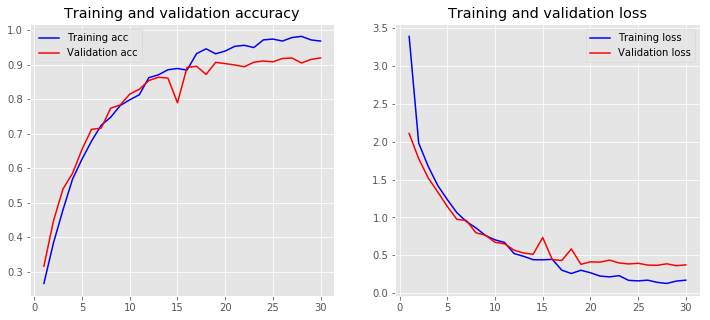

In [34]:
plot_history(hist)